# NER - Named Entity Recognition - распознавание именованных сущностей


Имена людей, названия организаций, книг, городов, и другие имена собственные называют «именованные сущности» (named entities), а саму задачу — «распознавание именованных сущностей». По-английски «Named entity recognition» или коротко NER; это сокращение регулярно используется и в русскоязычных текстах.

За одной задачей NER, на самом деле, стоит две: 1) обнаружить, что какая-то последовательность слов — это именованная сущность; 2) понять, к какому классу (имя человека, название организации, город и т.п.) эта именованная сущность относится. На каждом из этапов возникают свои сложности.

## Подходы

### Sequence Labeling

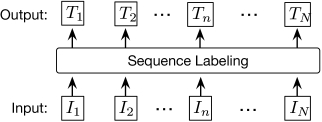

#### CNN + BiLSTM + CRF


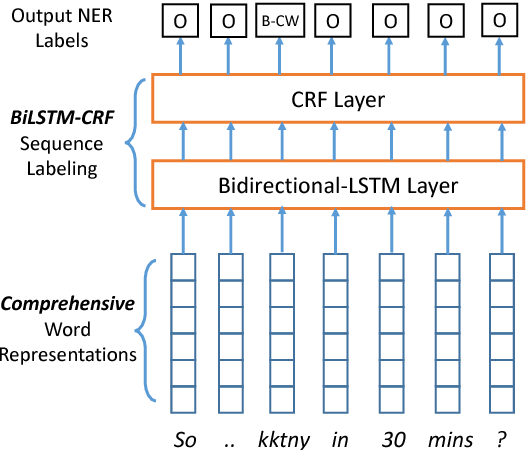


[End-to-end Sequence Labeling via Bi-directional LSTM-CNNs-CRF](https://arxiv.org/pdf/1603.01354.pdf)

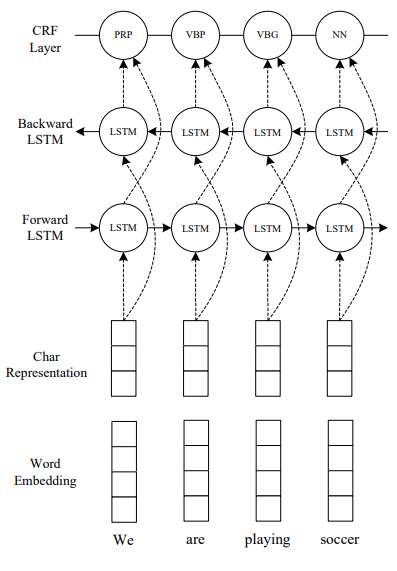

#### Transformers

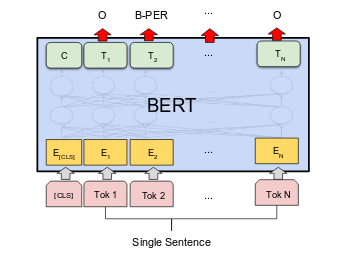

### Machine reading comprehension

**SQuAD** - набор данных для понимания прочитанного, состоящий из вопросов, заданных людьми в наборе статей Википедии, где ответом на каждый вопрос является фрагмент текста или промежуток из соответствующего отрывка для чтения. Вопрос может быть также безответным.

```
"data": [
   {"title": "Beyonc\u00e9", 
    "paragraphs": [{"qas": [
       {"question": "When did Beyonce start becoming popular?",         
        "answers": [{"text": "in the late 1990s", "answer_start": 269}], 
        "is_impossible": false}, 
    
       {"question": "What areas did Beyonce compete in when she was growing up?",     
        "answers": [{"text": "singing and dancing", "answer_start": 207}], 
        "is_impossible": false}, 
        
       {"question": "In what city and state did Beyonce  grow up? ",     
        "answers": [{"text": "Houston, Texas", "answer_start": 166}], 
        "is_impossible": false}
```


Переформулируем NER-задачу:

- вопрос - определение именованной сущности
- параграф - текст / предложение
- ответ - именованные сущности, подпадающие под вопрос


Теперь можно делать zero-shot NER

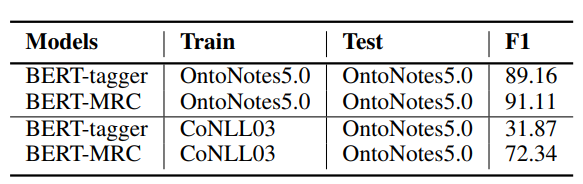

[A Unified MRC Framework for Named Entity Recognition](https://arxiv.org/pdf/1910.11476.pdf) 

### Template-based NER

Кроме encoder-части есть decoder часть, генерирующая предложение по шаблону

[Template-Based Named Entity Recognition Using BART](https://arxiv.org/pdf/2106.01760.pdf)

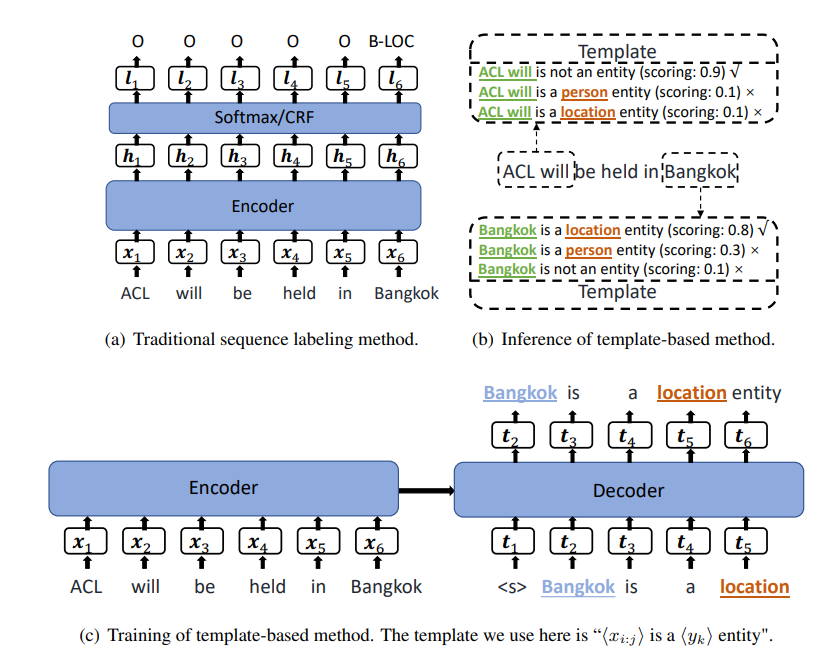


## Инструменты

In [ ]:
text = """
Ирина Яковлева интересовалась Японией, несколько раз побывала в этой стране в отпуске, а в 2016 году решилась переехать. 
По словам девушки, она смотрела и читала всё, что находила про Японию, учила язык, но ко всему подготовиться оказалось невозможно. 
Сейчас Ирина живет в Йокогаме и ведет Telegram-канал о своей жизни — она рассказала NGS.RU, как отличается отношение японцев к русским туристам 
и русским иммигрантам, развенчала популярные мифы об их образе жизни и поделилась своей историей поиска жилья и работы в Японии.
"""

### DeepPavlov BERT NER 

[Документация](http://docs.deeppavlov.ai/en/master/features/models/NER.html)

In [ ]:
!pip install -q deeppavlov

In [ ]:
!python -m deeppavlov install ner_collection3_bert

In [ ]:
from deeppavlov import build_model

ner_model = build_model('ner_collection3_bert', download=True, install=True) # русскоязычная модель с топовым качеством

2023-03-19 23:11:19.848 INFO in 'deeppavlov.core.data.utils'['utils'] at line 95: Downloading from http://files.deeppavlov.ai/v1/ner/ner_rus_bert_coll3_torch.tar.gz to /root/.deeppavlov/models/ner_rus_bert_coll3_torch.tar.gz
INFO:deeppavlov.core.data.utils:Downloading from http://files.deeppavlov.ai/v1/ner/ner_rus_bert_coll3_torch.tar.gz to /root/.deeppavlov/models/ner_rus_bert_coll3_torch.tar.gz
100%|██████████| 1.44G/1.44G [00:59<00:00, 24.3MB/s]
2023-03-19 23:12:19.814 INFO in 'deeppavlov.core.data.utils'['utils'] at line 276: Extracting /root/.deeppavlov/models/ner_rus_bert_coll3_torch.tar.gz archive into /root/.deeppavlov/models/ner_rus_bert_coll3_torch
INFO:deeppavlov.core.data.utils:Extracting /root/.deeppavlov/models/ner_rus_bert_coll3_torch.tar.gz archive into /root/.deeppavlov/models/ner_rus_bert_coll3_torch


Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertForTokenClassification: ['cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initializ

In [ ]:
res = ner_model([text])
print(res[0])
print(res[1])

[['\n', 'Ирина', 'Яковлева', 'интересовалась', 'Японией', ',', 'несколько', 'раз', 'побывала', 'в', 'этой', 'стране', 'в', 'отпуске', ',', 'а', 'в', '2016', 'году', 'решилась', 'переехать', '.', '\n', 'По', 'словам', 'девушки', ',', 'она', 'смотрела', 'и', 'читала', 'всё', ',', 'что', 'находила', 'про', 'Японию', ',', 'учила', 'язык', ',', 'но', 'ко', 'всему', 'подготовиться', 'оказалось', 'невозможно', '.', '\n', 'Сейчас', 'Ирина', 'живет', 'в', 'Йокогаме', 'и', 'ведет', 'Telegram', '-', 'канал', 'о', 'своей', 'жизни', '—', 'она', 'рассказала', 'NGS', '.', 'RU', ',', 'как', 'отличается', 'отношение', 'японцев', 'к', 'русским', 'туристам', '\n', 'и', 'русским', 'иммигрантам', ',', 'развенчала', 'популярные', 'мифы', 'об', 'их', 'образе', 'жизни', 'и', 'поделилась', 'своей', 'историей', 'поиска', 'жилья', 'и', 'работы', 'в', 'Японии', '.', '\n']]
[['O', 'B-PER', 'E-PER', 'O', 'S-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'

### Slovnet (Natasha)

`В 2020 году в проекте Natasha нам удалось вплотную приблизится по качеству к DeepPavlov BERT NER, размер модели получился в 75 раз меньше (27МБ), потребление памяти в 30 раз меньше (205МБ), скорость в 2 раза больше на CPU (25 статей в секунду).`

[slovnet repo](https://github.com/natasha/slovnet#ner)

Natasha (Slovnet NER) = Slovnet BERT NER — аналог DeepPavlov BERT NER + дистилляция через синтетическую разметку (Nerus) в WordCNN-CRF c квантованными эмбеддингами (Navec) + движок для инференса на NumPy.

[Подробнее об обучении](https://natasha.github.io/ner/)


In [ ]:
!pip install slovnet

In [ ]:
!pip install ipymarkup

In [ ]:
from navec import Navec
from slovnet import NER
from ipymarkup import show_span_ascii_markup as show_markup

In [ ]:
navec = Navec.load('navec_news_v1_1B_250K_300d_100q.tar')
ner = NER.load('slovnet_ner_news_v1.tar')
ner.navec(navec)

markup = ner(text)
show_markup(markup.text, markup.spans)

Ирина Яковлева интересовалась Японией, несколько раз побывала в этой 
PER───────────                LOC────                                
стране в отпуске, а в 2016 году решилась переехать. 
По словам девушки, она смотрела и читала всё, что находила про Японию,
                                                               LOC─── 
 учила язык, но ко всему подготовиться оказалось невозможно. 
Сейчас Ирина живет в Йокогаме и ведет Telegram-канал о своей жизни — 
       PER──         LOC─────         ORG───────────                 
она рассказала NGS.RU, как отличается отношение японцев к русским 
               ORG───                                             
туристам 
и русским иммигрантам, развенчала популярные мифы об их образе жизни и
 поделилась своей историей поиска жилья и работы в Японии.
                                                   LOC─── 


### Spacy 

In [ ]:
import spacy

In [ ]:
!python -m spacy download ru_core_news_sm

In [ ]:
nlp = spacy.load("ru_core_news_sm")
doc = nlp(text)

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Ирина Яковлева 1 15 PER
Японией 31 38 LOC
Японию 186 192 LOC
Ирина 262 267 PER
Йокогаме 276 284 LOC
Telegram-канал 293 307 ORG
NGS.RU 339 345 ORG
Японии 521 527 LOC


### Stanza

Stanza — это набор точных и эффективных инструментов для лингвистического анализа многих человеческих языков, разработанных университетом Стенфордом в 2020 году.  Он содержит инструменты, которые можно использовать в конвейере для преобразования строки, содержащей текст на человеческом языке в списки предложений и слов с целью создания базовых форм этих слов, их частей речи и морфологических признаков, для анализа зависимости синтаксической структуры и распознавания именованных сущностей. Инструментарий предназначен для параллельного использования более чем 70 языков.

[Документация](https://stanfordnlp.github.io/stanza/ner.html#example-usage)

In [ ]:
!pip install stanza

In [ ]:
import stanza

In [ ]:
nlp = stanza.Pipeline(lang='ru', processors='tokenize,ner')
doc = nlp(text)
print(*[f'entity: {ent.text}\ttype: {ent.type}' for ent in doc.ents], sep='\n')

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: ru (Russian):
| Processor | Package   |
-------------------------
| tokenize  | syntagrus |
| ner       | wikiner   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Ирина Яковлева	type: PER
entity: Японией	type: LOC
entity: Японию	type: LOC
entity: Ирина	type: PER
entity: Йокогаме	type: LOC
entity: Telegram	type: ORG
entity: Японии	type: LOC


### Flair

[Flair repo](https://github.com/flairNLP/flair)

```
A very simple framework for state-of-the-art NLP. Developed by Humboldt University of Berlin and friends.

Flair is:

A powerful NLP library. Flair allows you to apply our state-of-the-art natural language processing (NLP) models to your text, such as named entity recognition (NER), sentiment analysis, part-of-speech tagging (PoS), special support for biomedical data, sense disambiguation and classification, with support for a rapidly growing number of languages.

A text embedding library. Flair has simple interfaces that allow you to use and combine different word and document embeddings, including our proposed Flair embeddings and various transformers.

A PyTorch NLP framework. Our framework builds directly on PyTorch, making it easy to train your own models and experiment with new approaches using Flair embeddings and classes.
```

У библиотеки развитое сообщество, причем не только ориентированное на английский язык, благодаря большому количеству доступных моделей Flair существенно более демократичен в выборе языков чем Spacy.


In [ ]:
!pip install flair

In [ ]:
from flair.data import Sentence
from flair.nn import Classifier

In [ ]:
sentence = Sentence('George Washington went to Washington')

# load the NER tagger
tagger = Classifier.load('ner')

# run NER over sentence
tagger.predict(sentence)

# print the sentence with all annotations
print(sentence)

Downloading:   0%|          | 0.00/432M [00:00<?, ?B/s]

2023-03-20 10:59:25,594 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, S-ORG, S-MISC, B-PER, E-PER, S-LOC, B-ORG, E-ORG, I-PER, S-PER, B-MISC, I-MISC, E-MISC, I-ORG, B-LOC, E-LOC, I-LOC, <START>, <STOP>
Sentence[5]: "George Washington went to Washington" → ["George Washington"/PER, "Washington"/LOC]


### Allennlp

[Allennlp](https://allenai.org/allennlp) - библиотека для исследовательской работы, построенная на PyTorch

[repo](https://github.com/allenai/allennlp) 

In [ ]:
!pip install allennlp

In [ ]:
!pip install allennlp_models

In [4]:
from allennlp.predictors.predictor import Predictor
import allennlp_models.tagging

In [7]:
predictor = Predictor.from_path("https://storage.googleapis.com/allennlp-public-models/ner-elmo.2021-02-12.tar.gz")
result = predictor.predict(
    sentence="Did Uriah honestly think he could beat The Legend of Zelda in under three hours?"
)

In [9]:
for i in zip(result['tags'], result['words']):
    if (i[0]) != 'O':
      print(i)

('U-PER', 'Uriah')
('B-MISC', 'The')
('I-MISC', 'Legend')
('I-MISC', 'of')
('L-MISC', 'Zelda')


### Huggingface

In [1]:
sentence = 'Did Uriah honestly think he could beat The Legend of Zelda in under three hours?'

In [ ]:
!pip install transformers

In [3]:
from transformers import pipeline

In [12]:
ner_pipe = pipeline("ner")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english)


Downloading:   0%|          | 0.00/998 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.24G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

In [13]:
for entity in ner_pipe(sentence):
     print(entity)

{'entity': 'I-PER', 'score': 0.9988232, 'index': 2, 'word': 'U', 'start': 4, 'end': 5}
{'entity': 'I-PER', 'score': 0.9267636, 'index': 3, 'word': '##ria', 'start': 5, 'end': 8}
{'entity': 'I-PER', 'score': 0.9812889, 'index': 4, 'word': '##h', 'start': 8, 'end': 9}
{'entity': 'I-MISC', 'score': 0.67581725, 'index': 10, 'word': 'The', 'start': 39, 'end': 42}
{'entity': 'I-MISC', 'score': 0.9958402, 'index': 11, 'word': 'Legend', 'start': 43, 'end': 49}
{'entity': 'I-MISC', 'score': 0.99619603, 'index': 12, 'word': 'of', 'start': 50, 'end': 52}
{'entity': 'I-MISC', 'score': 0.99681073, 'index': 13, 'word': 'Z', 'start': 53, 'end': 54}
{'entity': 'I-MISC', 'score': 0.9875707, 'index': 14, 'word': '##eld', 'start': 54, 'end': 57}
{'entity': 'I-MISC', 'score': 0.99467236, 'index': 15, 'word': '##a', 'start': 57, 'end': 58}


In [4]:
pipe = pipeline("ner", model="xlm-roberta-large-finetuned-conll03-english", device=0)

In [6]:
for entity in pipe(sentence):
     print(entity)

{'entity': 'I-PER', 'score': 0.99999094, 'index': 2, 'word': '▁Ur', 'start': 4, 'end': 6}
{'entity': 'I-PER', 'score': 0.9999883, 'index': 3, 'word': 'iah', 'start': 6, 'end': 9}
{'entity': 'I-MISC', 'score': 0.9997652, 'index': 10, 'word': '▁The', 'start': 39, 'end': 42}
{'entity': 'I-MISC', 'score': 0.9995291, 'index': 11, 'word': '▁Legend', 'start': 43, 'end': 49}
{'entity': 'I-MISC', 'score': 0.99981123, 'index': 12, 'word': '▁of', 'start': 50, 'end': 52}
{'entity': 'I-MISC', 'score': 0.9998667, 'index': 13, 'word': '▁Z', 'start': 53, 'end': 54}
{'entity': 'I-MISC', 'score': 0.9997186, 'index': 14, 'word': 'elda', 'start': 54, 'end': 58}


[Comparison of Named Entity Recognition Tools Applied to News Articles](https://www.researchgate.net/publication/339268904_Comparison_of_Named_Entity_Recognition_Tools_Applied_to_News_Articles)

## Датасеты

- monolingual
- multilingual

[Datasets for Entity Recognition](https://github.com/juand-r/entity-recognition-datasets)

## Оценка качества



### Seqeval

[seqeval](https://github.com/chakki-works/seqeval) - библиотека, предоставляющая удобные методы для валидации моделей sequence labeling

In [ ]:
!pip install seqeval

In [8]:
from seqeval.metrics import accuracy_score
from seqeval.metrics import classification_report
from seqeval.metrics import f1_score

In [9]:
y_true = [['O', 'O', 'O', 'B-MISC', 'I-MISC', 'I-MISC', 'O'], ['B-PER', 'I-PER', 'O']]
y_pred = [['O', 'O', 'B-MISC', 'I-MISC', 'I-MISC', 'I-MISC', 'O'], ['B-PER', 'I-PER', 'O']]
f1_score(y_true, y_pred)

0.5

In [11]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        MISC       0.00      0.00      0.00         1
         PER       1.00      1.00      1.00         1

   micro avg       0.50      0.50      0.50         2
   macro avg       0.50      0.50      0.50         2
weighted avg       0.50      0.50      0.50         2



# Что еще почитать?

[Марковские случайные поля](https://habr.com/ru/post/241317/)

[Conditional Random Fields Explained](https://towardsdatascience.com/conditional-random-fields-explained-e5b8256da776)

[NLP. Основы. Техники. Саморазвитие. Часть 2: NER](https://habr.com/ru/company/contentai/blog/449514/)

[Named Entity Recognition (NER) DeepPavlov](http://docs.deeppavlov.ai/en/master/features/models/NER.html)

[NER для русского языка в Spacy 3: удобно и легко](https://habr.com/ru/post/571950/)

[Сравниваем работу open source Python — библиотек для распознавания именованных сущностей](https://habr.com/ru/post/502366/)

[Paper with Code - Named Entity Recognition (NER)](https://paperswithcode.com/task/named-entity-recognition-ner)

[Evaluation metrics for custom named entity recognition models](https://learn.microsoft.com/en-us/azure/cognitive-services/language-service/custom-named-entity-recognition/concepts/evaluation-metrics)

[Искусство распознавания: как мы разрабатывали прототип AutoML для задачи Named Entity Recognition](https://habr.com/ru/company/vtb/blog/651525/)

[An In-Depth Tutorial on the F-Score For NER](https://pub.towardsai.net/an-in-depth-tutorial-on-the-f-score-for-ner-55e944bd28ce)